### Inventory Exploration

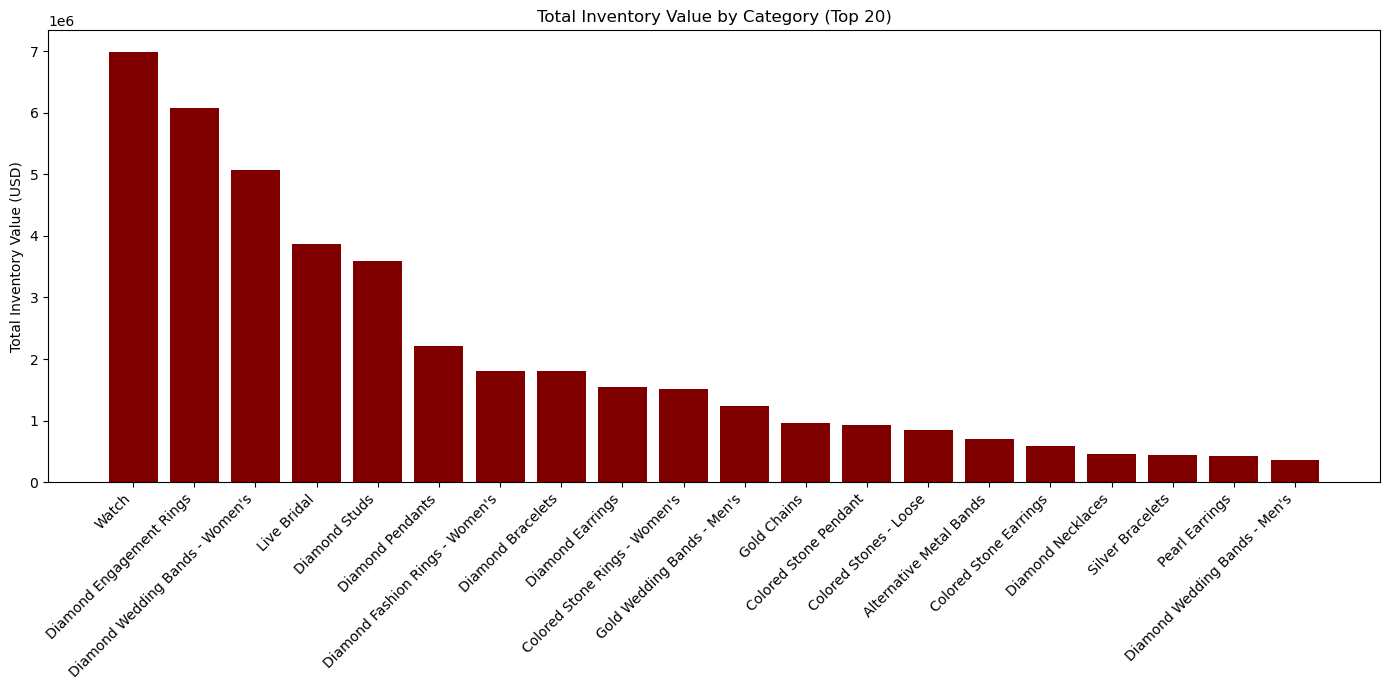

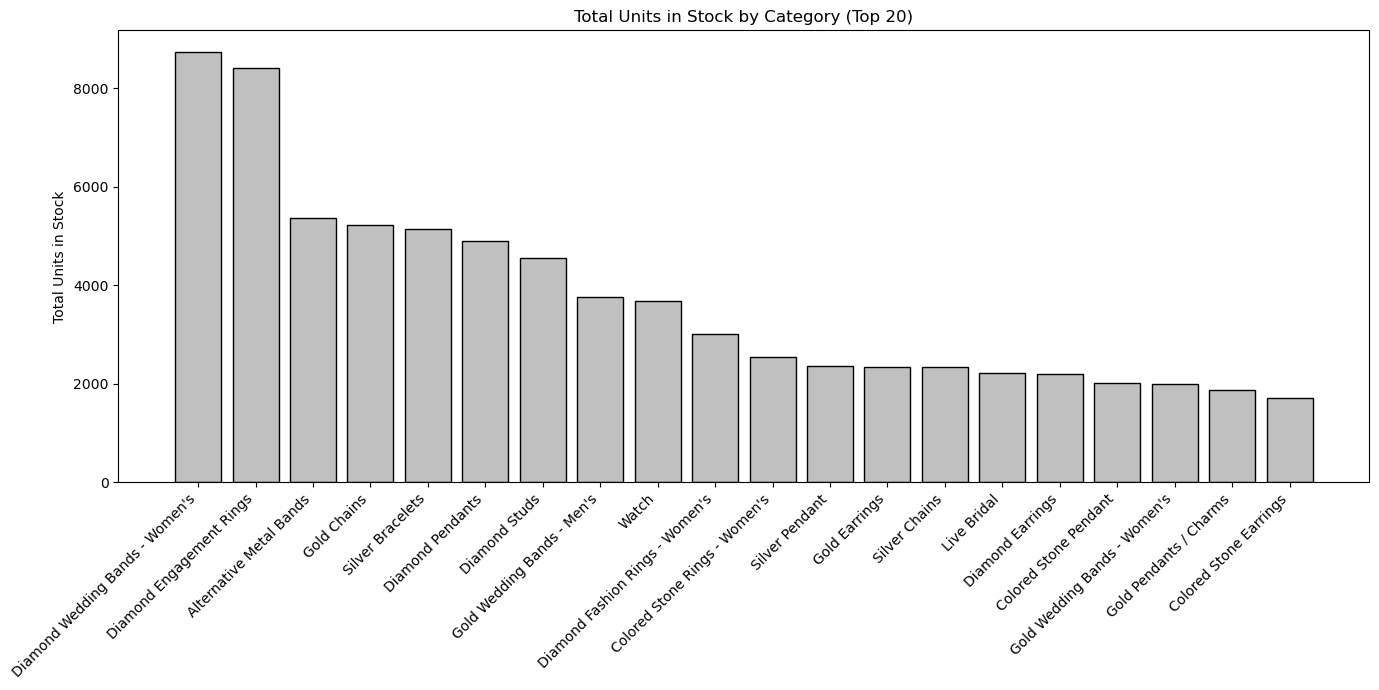

In [1]:
# Required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account

# Google BigQuery credentials
project_id = "capstone-project-2025-449217"
key_path = "/Users/juliehilley/Desktop/__Capstone & Prep/capstone-project-2025-449217-f9f34f80492d.json"
credentials = service_account.Credentials.from_service_account_file(key_path)
client = bigquery.Client(credentials=credentials, project=project_id)

# Define business colors
maroon = "#800000"
silver = "#C0C0C0"
black = "#000000"

### Query 1: Total Inventory Value by Category (Top 20) ###
query1 = """
SELECT category_name, SUM(cost) AS total_inventory_value
FROM `capstone-project-2025-449217.jdc_data.filtered_inventory`
GROUP BY category_name
ORDER BY total_inventory_value DESC
LIMIT 20
"""
df1 = client.query(query1).to_dataframe()

# Plot Total Inventory Value
plt.figure(figsize=(14, 7))
plt.bar(df1["category_name"], df1["total_inventory_value"], color=maroon)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Inventory Value (USD)")
plt.title("Total Inventory Value by Category (Top 20)")
plt.tight_layout()
plt.show()


### Query 2: Total Units in Stock by Category (Top 20) ###
query2 = """
SELECT category_name, COUNT(sku) AS total_units
FROM `capstone-project-2025-449217.jdc_data.filtered_inventory`
GROUP BY category_name
ORDER BY total_units DESC
LIMIT 20
"""
df2 = client.query(query2).to_dataframe()

# Plot Total Units in Stock
plt.figure(figsize=(14, 7))
plt.bar(df2["category_name"], df2["total_units"], color=silver, edgecolor=black)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Units in Stock")
plt.title("Total Units in Stock by Category (Top 20)")
plt.tight_layout()
plt.show()


### Query 3: Inventory Aging Distribution ###
# Run the updated query
query3 = """
SELECT 
  EXTRACT(YEAR FROM purchase_date) AS year_purchased,
  COUNT(sku) AS total_unsold_items
FROM `capstone-project-2025-449217.jdc_data.filtered_inventory`
WHERE purchase_date IS NOT NULL 
  AND sold_notsold = 'Not Sold'
GROUP BY year_purchased
ORDER BY year_purchased ASC;
"""

### Inventory Aging Distribution ###
# Run the updated query
df3 = client.query(query3).to_dataframe()

# Ensure `year_purchased` is treated as a string for plotting
if not df3.empty:
    df3["year_purchased"] = df3["year_purchased"].astype(int).astype(str)

    plt.figure(figsize=(14, 6))

    # Create the bar chart with desired color
    bars = plt.bar(df3["year_purchased"], df3["total_unsold_items"], color="#5f6368")

    # Add labels above the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + (max(df3["total_unsold_items"]) * 0.01),  # Slightly above each bar
            f"{int(height):,}",  # Format with commas
            ha="center", va="bottom", fontsize=10, color="#5f6368", fontweight="bold"
        )

    # Formatting the plot
    plt.xlabel("Year Purchased")
    plt.ylabel("")  # Remove y-axis label
    plt.title("Unsold Inventory Aging Distribution by Year")
    plt.xticks(rotation=45)
    plt.yticks([])  # Hide y-axis ticks for clean look
    plt.tight_layout()
    plt.show()

